In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import Rbf, griddata
import matplotlib.pyplot as plt
from matplotlib import cm

### Data

In [2]:
data = pd.read_csv("data.csv")
data

,x,y,z
0,-76.951566,2.265249,23.375656
1,-74.464348,1.719166,26.428136
2,-77.348223,3.583503,25.141943
3,-75.785812,3.579410,25.760233
4,-76.616830,3.272989,26.619773
...,...,...,...
95,-76.667257,1.876938,24.121160
96,-76.587599,4.481100,23.371691
97,-76.827774,4.406193,26.277111
98,-75.460146,2.836873,24.548552


In [3]:
points = np.array(data[["x","y"]])

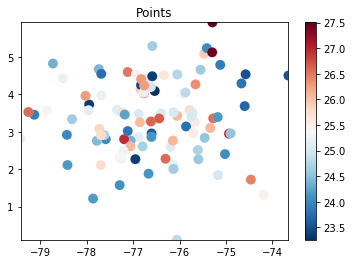

In [4]:
plt.subplot(1, 1, 1)
lims = dict(cmap='RdBu_r', vmin=data["z"].min(), vmax=data["z"].max())
plt.scatter(data["x"], data["y"], 100, data["z"], edgecolor='w', lw=0.1, **lims)
plt.title('Points')
plt.xlim(data["x"].min(),data["x"].max())
plt.ylim(data["y"].min(),data["y"].max())
plt.colorbar()

### Grid Parameters

In [5]:
maxX = np.ceil(data["x"].max())
minX = np.floor(data["x"].min())

maxY = np.ceil(data["y"].max())
minY = np.floor(data["y"].min())

cellSize = 0.1

In [6]:
grid_x, grid_y = np.mgrid[minX:maxX:cellSize, minY:maxY:cellSize]

### RBF Interpolation

In [7]:
rbf = Rbf(data["x"], data["y"], data["z"], epsilon=0.00001)
ZI = rbf(grid_x, grid_y)

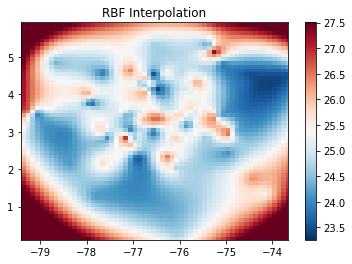

In [8]:
plt.subplot(1, 1, 1)
lims = dict(cmap='RdBu_r', vmin=data["z"].min(), vmax=data["z"].max())
plt.pcolormesh(grid_x, grid_y, ZI, shading='flat', **lims)
plt.title('RBF Interpolation')
plt.xlim(data["x"].min(),data["x"].max())
plt.ylim(data["y"].min(),data["y"].max())
plt.colorbar()

### Nearest Neighbor

In [9]:
grid_z0 = griddata(points, data["z"], (grid_x, grid_y), method='nearest')

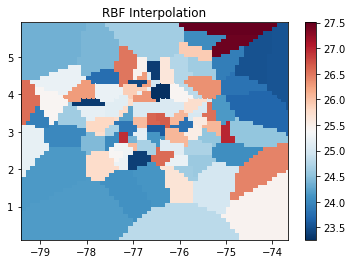

In [12]:
plt.subplot(1, 1, 1)
lims = dict(cmap='RdBu_r', vmin=data["z"].min(), vmax=data["z"].max())
plt.pcolormesh(grid_x, grid_y, grid_z0, shading='flat', **lims)
plt.title('RBF Interpolation')
plt.xlim(data["x"].min(),data["x"].max())
plt.ylim(data["y"].min(),data["y"].max())
plt.colorbar()

### Linear Interpolation

In [13]:
grid_z1 = griddata(points, data["z"], (grid_x, grid_y), method='linear')

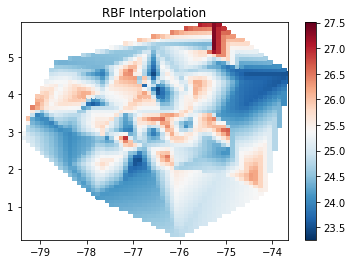

In [14]:
plt.subplot(1, 1, 1)
lims = dict(cmap='RdBu_r', vmin=data["z"].min(), vmax=data["z"].max())
plt.pcolormesh(grid_x, grid_y, grid_z1, shading='flat', **lims)
plt.title('RBF Interpolation')
plt.xlim(data["x"].min(),data["x"].max())
plt.ylim(data["y"].min(),data["y"].max())
plt.colorbar()

### Cubic Interpolation

In [15]:
grid_z2 = griddata(points, data["z"], (grid_x, grid_y), method='cubic')

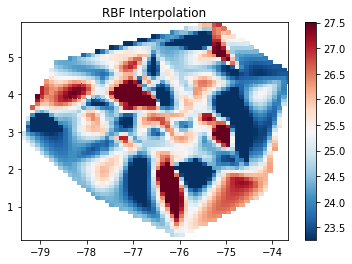

In [16]:
plt.subplot(1, 1, 1)
lims = dict(cmap='RdBu_r', vmin=data["z"].min(), vmax=data["z"].max())
plt.pcolormesh(grid_x, grid_y, grid_z2, shading='flat', **lims)
plt.title('RBF Interpolation')
plt.xlim(data["x"].min(),data["x"].max())
plt.ylim(data["y"].min(),data["y"].max())
plt.colorbar()